- authors: Macrina Lobo

In [1]:
import scanpy as sc

In [8]:
import pandas as pd

In [17]:
import anndata

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
# color_map
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


sc.settings.set_figure_params(dpi=160)
plt.rcParams['figure.figsize']=(16,16) #rescale figures
sc.settings.verbosity = 3
sc.logging.print_versions()


sc.pl.DotPlot.DEFAULT_COLORMAP = 'plasma'

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
appnope             0.1.0
backcall            0.2.0
cairo               1.19.1
cffi                1.14.0
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                2.10.0
igraph              0.8.2
ipykernel           5.3.3
ipython_genutils    0.2.0
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.1
llvmlite            0.33.0
louvain             0.6.1
matplotlib          3.3.0
mpl_toolkits        NA
natsort             7.0.1
numba               0.50.1
numexpr             2.7.1
numpy               1.18.5
packaging           20.4
pandas              1.1.4
parso               0.7.0
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.5
psutil

In [2]:
color_val = ['brown','cyan4','firebrick3','mistyrose2','green3','tan4','lightslateblue','deepskyblue','lightpink2','lightskyblue2','goldenrod1','purple4']

In [3]:
color_idx = ['A','B','C','D','E','F','G','H','I','J','K','L']

In [4]:
len(color_idx)

12

In [5]:
len(color_val)

12

In [11]:
cluster_info = pd.read_csv("cluster_info.csv",index_col=0)

In [13]:
subnet_score = pd.read_csv("subnet_score.csv",index_col=0).T

In [16]:
cluster_info.loc[subnet_score.index,'ident']

AAACCTGAGCCAACAG|CR_pharynx_E9_5_rep1     1
AAACCTGCAACGATCT|CR_pharynx_E9_5_rep1     1
AAACCTGGTAATAGCA|CR_pharynx_E9_5_rep1     1
AAACCTGGTTAGGGTG|CR_pharynx_E9_5_rep1     1
AAACGGGCAAACGCGA|CR_pharynx_E9_5_rep1     1
                                         ..
TGAGCATCAGTCGATT|CR_pharynx_E12_5_rep2    4
TGGCGCATCCTTGCCA|CR_pharynx_E12_5_rep2    4
TGTATTCAGCATGGCA|CR_pharynx_E12_5_rep2    4
TTCTTAGCATCACCCT|CR_pharynx_E12_5_rep2    4
TTCTTAGGTAGTAGTA|CR_pharynx_E12_5_rep2    4
Name: ident, Length: 54044, dtype: int64

In [14]:
subnet_score

,subnet_E,subnet_G,subnet_A,subnet_H,subnet_B,subnet_J,subnet_D,subnet_L,subnet_K,subnet_F,subnet_C,subnet_I
AAACCTGAGCCAACAG|CR_pharynx_E9_5_rep1,0.000000,7.477392,2.247137,0.856653,0.856653,9.449564,4.283266,5.395415,0.000000,2.569960,20.354974,9.311370
AAACCTGCAACGATCT|CR_pharynx_E9_5_rep1,0.000000,12.236443,2.993970,1.345503,4.200309,10.441078,4.121168,5.545241,0.000000,8.236818,18.346684,6.509210
AAACCTGGTAATAGCA|CR_pharynx_E9_5_rep1,2.490375,8.477043,5.369092,0.959572,5.777214,7.939258,5.706636,2.898498,1.919144,3.838289,19.163620,5.369092
AAACCTGGTTAGGGTG|CR_pharynx_E9_5_rep1,0.000000,7.410411,3.240651,0.810163,2.430488,8.527685,10.493173,3.975212,0.000000,8.028386,19.098519,8.270922
AAACGGGCAAACGCGA|CR_pharynx_E9_5_rep1,2.481184,6.277642,1.240592,0.000000,2.481184,6.761390,4.378777,4.244937,0.000000,4.962368,15.030812,10.206668
...,...,...,...,...,...,...,...,...,...,...,...,...
TGAGCATCAGTCGATT|CR_pharynx_E12_5_rep2,7.087352,4.998123,2.089230,0.000000,4.178460,2.089230,4.178460,4.998123,0.000000,0.000000,12.166419,2.089230
TGGCGCATCCTTGCCA|CR_pharynx_E12_5_rep2,6.770195,2.793837,8.758374,0.000000,0.000000,7.952716,1.988179,4.782016,0.000000,10.077926,6.221158,1.988179
TGTATTCAGCATGGCA|CR_pharynx_E12_5_rep2,3.974558,2.562370,0.000000,0.000000,2.562370,2.562370,2.562370,5.124740,0.000000,5.124740,10.249479,0.000000
TTCTTAGCATCACCCT|CR_pharynx_E12_5_rep2,5.836625,2.169588,12.383682,0.000000,4.377469,5.087901,1.459156,3.628745,0.000000,2.918313,15.304917,5.798333


In [144]:
y_order = ['subnet_A','subnet_E','subnet_B','subnet_G','subnet_L','subnet_C','subnet_F','subnet_D','subnet_I','subnet_K','subnet_J','subnet_H']

In [163]:
y_order = ['subnet_A','subnet_E','subnet_B','subnet_C','subnet_I','subnet_K','subnet_J','subnet_F','subnet_L','subnet_G','subnet_D','subnet_H']

In [164]:
len(y_order)

12

In [165]:
len(set(y_order))

12

In [166]:
subnet_score = subnet_score[y_order]

In [167]:
adata = anndata.AnnData(X=subnet_score)

In [168]:
adata.obs['cluster'] = [str(entry) for entry in cluster_info.loc[adata.obs.index,'ident']]

In [169]:
adata

AnnData object with n_obs × n_vars = 54044 × 12
    obs: 'cluster'

In [170]:
custom_order = ['22','17','13','24','23','14','16','21','1','8','9','26','12','2','3','19','27','10','15','0','11','5','7','18','6','20','25','4']

In [171]:
len(custom_order)

28

In [172]:
set(custom_order)

{'0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9'}

In [173]:
adata.obs['cluster']

AAACCTGAGCCAACAG|CR_pharynx_E9_5_rep1     1
AAACCTGCAACGATCT|CR_pharynx_E9_5_rep1     1
AAACCTGGTAATAGCA|CR_pharynx_E9_5_rep1     1
AAACCTGGTTAGGGTG|CR_pharynx_E9_5_rep1     1
AAACGGGCAAACGCGA|CR_pharynx_E9_5_rep1     1
                                         ..
TGAGCATCAGTCGATT|CR_pharynx_E12_5_rep2    4
TGGCGCATCCTTGCCA|CR_pharynx_E12_5_rep2    4
TGTATTCAGCATGGCA|CR_pharynx_E12_5_rep2    4
TTCTTAGCATCACCCT|CR_pharynx_E12_5_rep2    4
TTCTTAGGTAGTAGTA|CR_pharynx_E12_5_rep2    4
Name: cluster, Length: 54044, dtype: object

In [174]:
adata.obs['cluster'] =adata.obs['cluster'].astype('category')

In [175]:
len(set(adata.obs['cluster']))

28

In [176]:
len(set(custom_order))

28

In [177]:
adata.obs['cluster'] = adata.obs['cluster'].cat.reorder_categories(custom_order)

- order y-axis

- add color_bar on X and y axis
- compute specificity

In [181]:
adata.uns['cluster_colors']=color_val

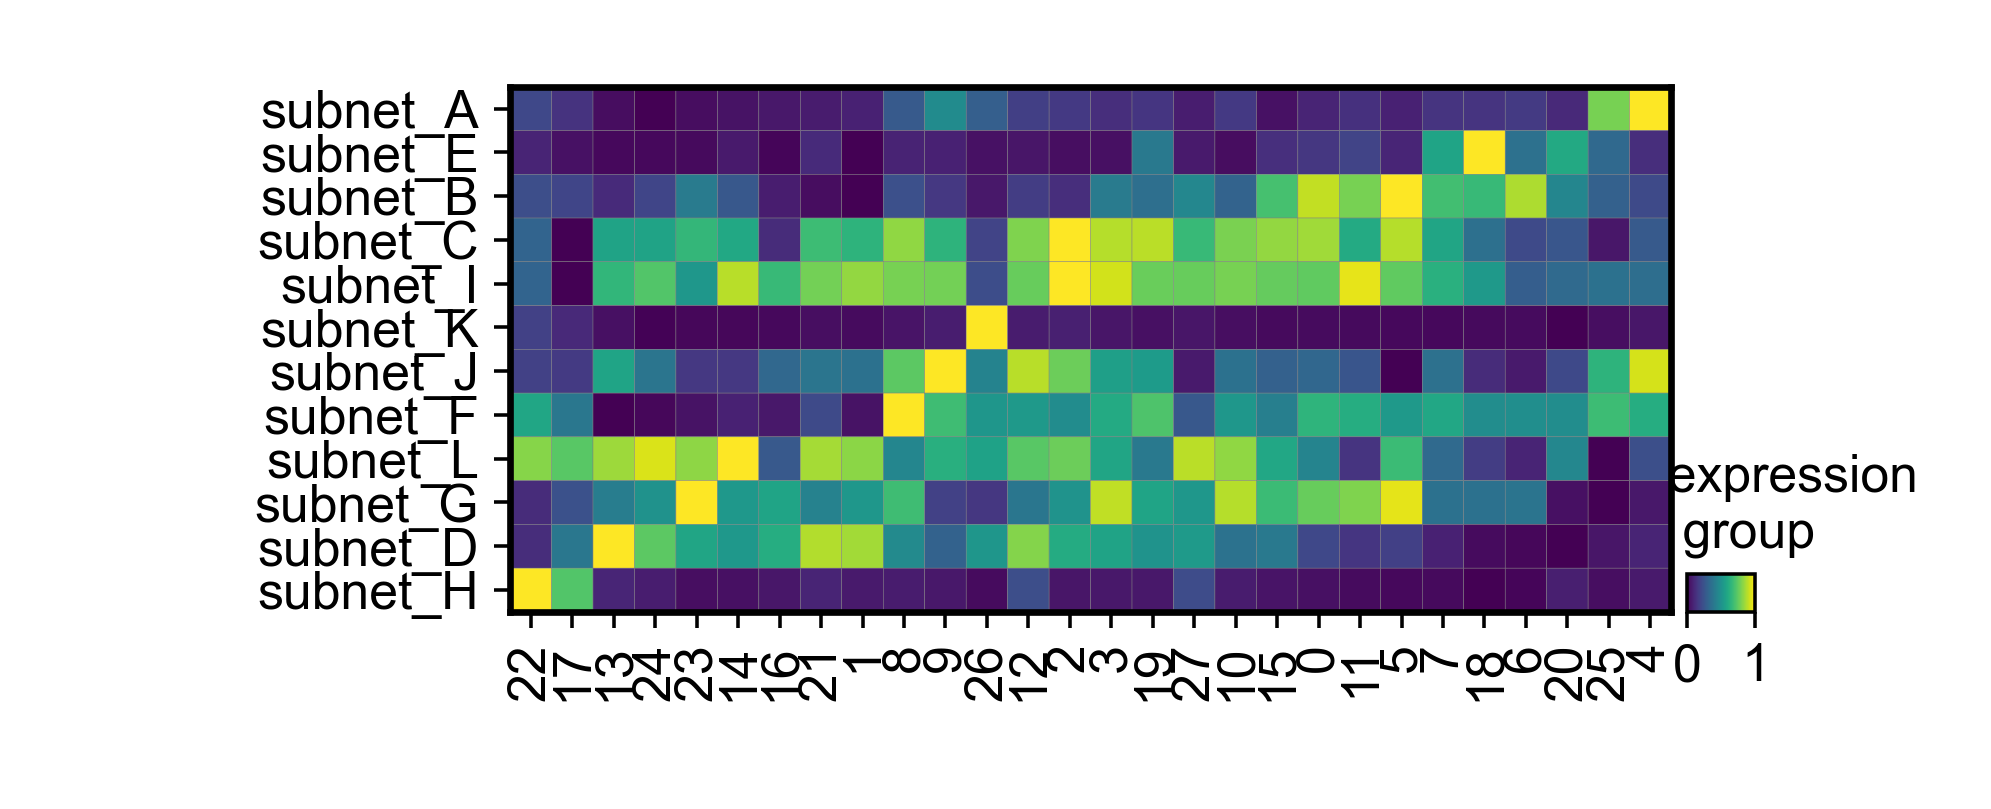

In [183]:
sc.pl.matrixplot(adata,figsize=(27,12),standard_scale='var',dendrogram=False,swap_axes=True,var_names=adata.var.index,groupby='cluster',save='_specifciity.pdf')

In [160]:
tmpa = ['subnet_A','subnet_e','subnet_B','subnet_C','subnet_I','subnet_K','subnet_J','subnet_F','subnet_L','subnet_G','subnet_D','subnet_H']

In [161]:
len(tmpa)

12

In [162]:
len(set(tmpa))

12

- specificty column

In [184]:
subnet_score['ident'] = cluster_info.loc[subnet_score.index,'ident']

In [186]:
subnet_score_ident = subnet_score.groupby(['ident']).mean()

In [249]:
spec_val = pd.DataFrame(np.zeros((12,1)),index=list(subnet_score_ident.columns),columns=['specificity'])
for entry in subnet_score_ident.columns:
    tmpval = list(subnet_score_ident[entry])
    div_by_max = 0*np.asarray(tmpval) if max(tmpval) == 0 else np.asarray(tmpval)/max(tmpval)
    # print(mean(div_by_max[div_by_max < 0.5]))
    spec_tmpval = 1*np.asarray(div_by_max < 0.5).mean()
    spec_val.loc[entry,'specificity'] = spec_tmpval
    # spec.append(spec_val)
    # print(div_by_max,spec_val)
   # tmp

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

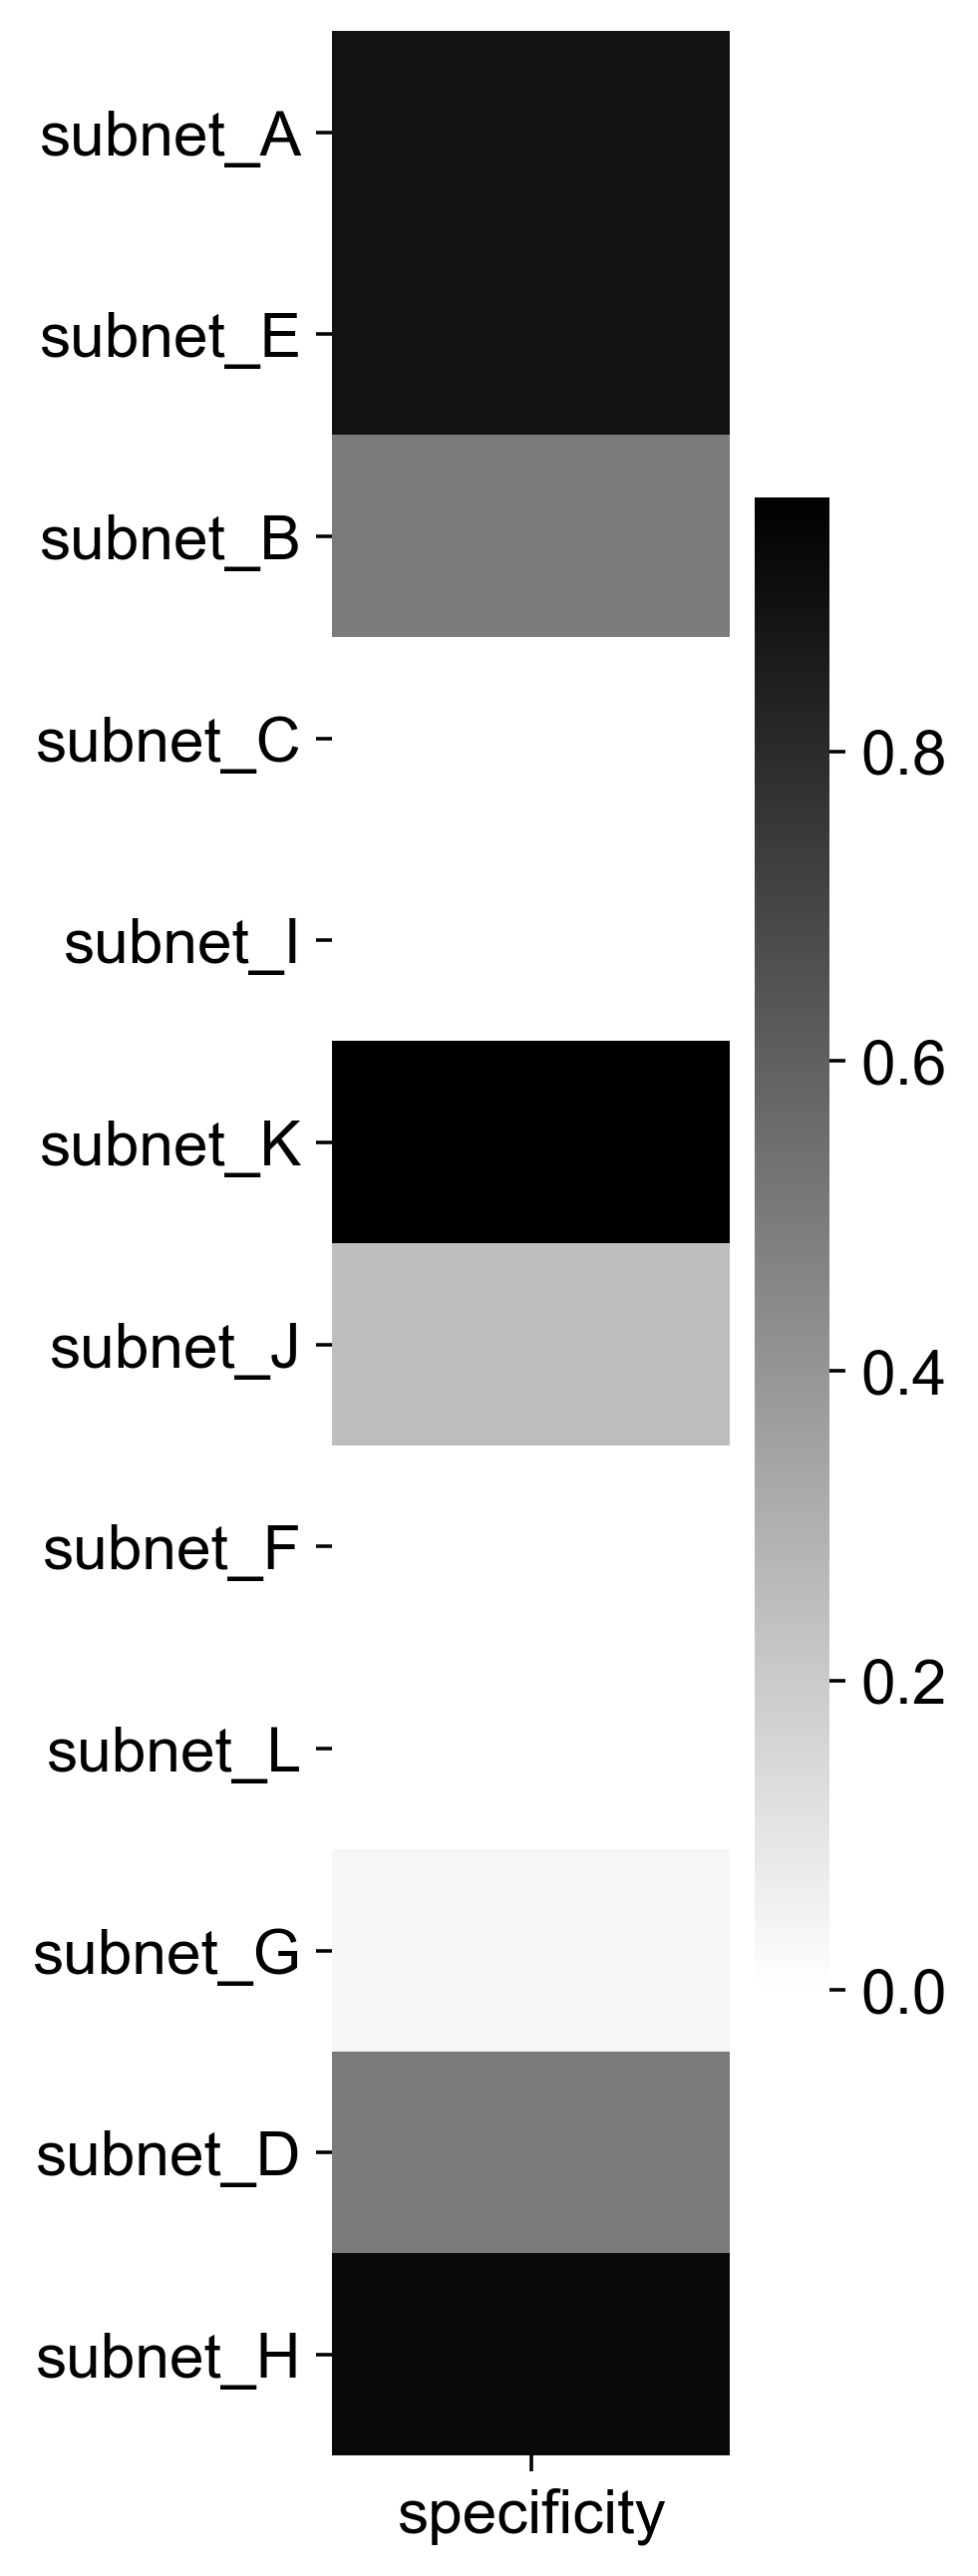

In [265]:
fig, ax = plt.subplots(figsize=(2,10))
svm = sns.heatmap(spec_val, annot=False, fmt="g", cmap='gray_r',ax=ax)
figure = svm.get_figure()    
figure.savefig('spec_scale.pdf', dpi=400)

In [206]:
from statistics import mean